# Group 2 Capstone Project: Malaria Risk Prediction

**Goal:** Predict malaria infection risk in Nigerian patients using machine learning.

**Dataset:** 4000 patient records with demographic, environmental, clinical, and lab features.

**Target variable:** `malaria_positive` (0 = Negative, 1 = Positive)

> **Note:** Full project description, objectives, and column details are documented in the GitHub README and `columns_description.txt`.

## Environment Setup (Google Colab)

**Technical Note:**  
The project's `requirements.txt` specifies `pycaret==3.0.4`, which works with Python 3.8--3.10.  
Google Colab now uses Python 3.12, which causes installation errors.

**Solution:** Install the latest compatible PyCaret version directly from GitHub.

In [ ]:

# Install the latest compatible PyCaret version from GitHub
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade
!pip install seaborn --quiet

# Note: After installation, restart the runtime for changes to take effect

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-kqh1ryr3
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-kqh1ryr3
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## 1️⃣ Import Libraries

In [ ]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

sns.set(style="whitegrid")

## 2️⃣ Load Dataset

In [ ]:

# Load Dataset
data = pd.read_csv("malaria_risk_dataset.csv")
data.head()

,age,temperature_celsius,region,season,lives_near_water,uses_mosquito_net,previous_malaria_cases,days_of_fever,has_headache,has_chills,has_fatigue,has_vomiting,appetite_loss,red_blood_cell_count,white_blood_cell_count,malaria_positive
0,73,39.6,North_West,Rainy_Season,1,1,5,8,0,1,0,1,1,4.70,6.80,1
1,55,38.0,North_West,Dry_Season,0,1,3,6,1,1,1,1,0,5.95,7.41,0
2,49,37.5,North_West,Dry_Season,0,0,1,3,1,1,0,0,1,5.98,8.12,0
3,23,36.6,North_East,Dry_Season,1,1,3,2,0,1,1,1,1,4.33,10.76,0
4,50,38.7,North_West,Dry_Season,1,1,2,2,0,0,1,0,0,5.91,8.91,0


## 3️⃣ Explore Dataset

In [ ]:

# Explore Dataset
data.info()
data.describe()
print("Target variable distribution:")
print(data['malaria_positive'].value_counts())

duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4000 non-null   int64  
 1   temperature_celsius     4000 non-null   float64
 2   region                  4000 non-null   object 
 3   season                  4000 non-null   object 
 4   lives_near_water        4000 non-null   int64  
 5   uses_mosquito_net       4000 non-null   int64  
 6   previous_malaria_cases  4000 non-null   int64  
 7   days_of_fever           4000 non-null   int64  
 8   has_headache            4000 non-null   int64  
 9   has_chills              4000 non-null   int64  
 10  has_fatigue             4000 non-null   int64  
 11  has_vomiting            4000 non-null   int64  
 12  appetite_loss           4000 non-null   int64  
 13  red_blood_cell_count    4000 non-null   float64
 14  white_blood_cell_count  4000 non-null   

## 4️⃣ Exploratory Data Analysis (EDA)

### Age Distribution by Malaria Status

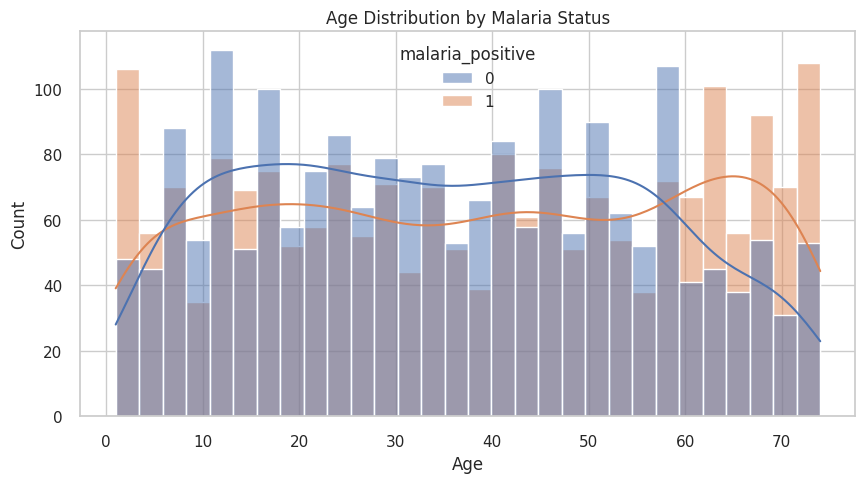

In [ ]:

# Age distribution by malaria status
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="age", hue="malaria_positive", bins=30, kde=True)
plt.title("Age Distribution by Malaria Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Key Features Analysis

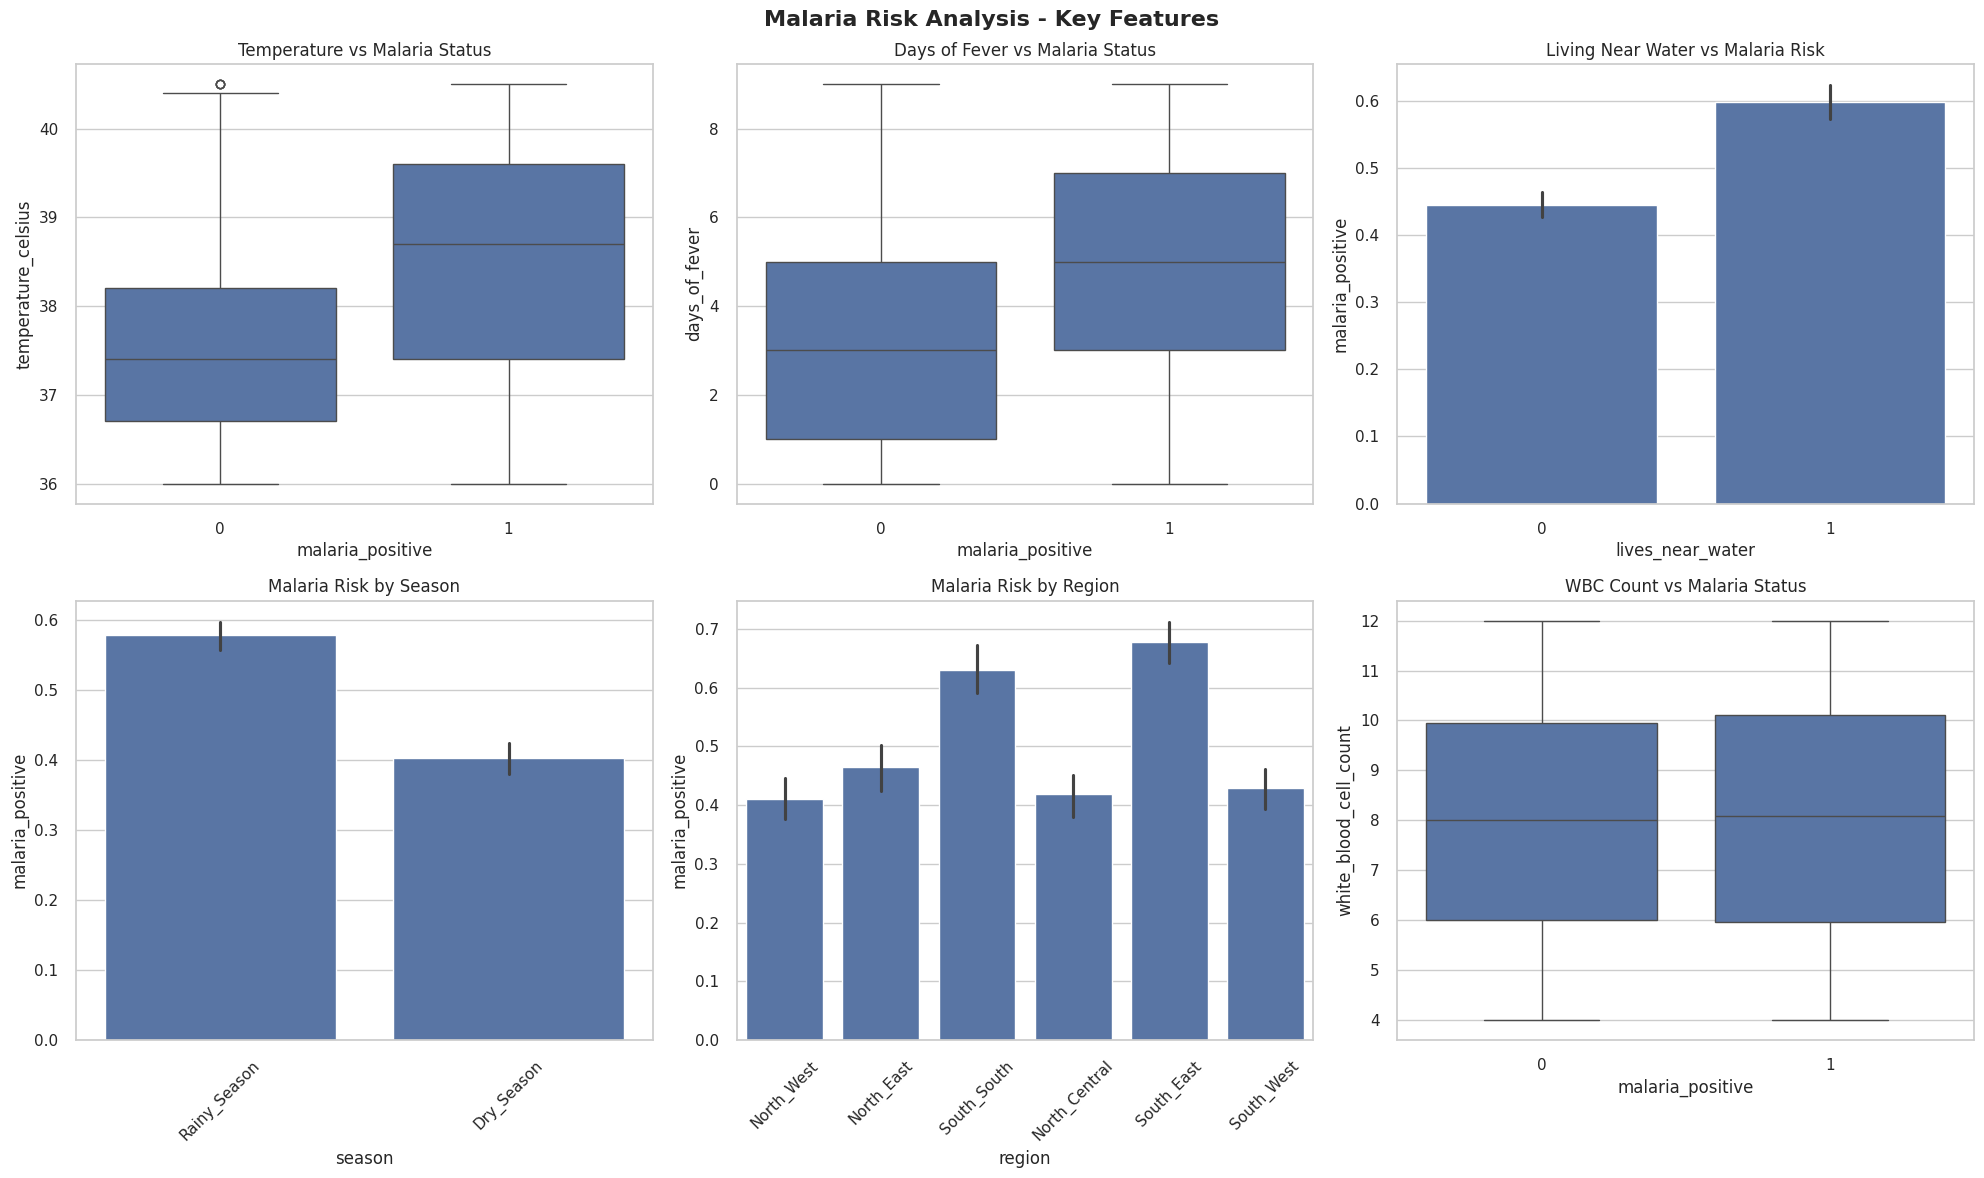

In [ ]:

# Key Features Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Malaria Risk Analysis - Key Features', fontsize=16, fontweight='bold')

# Temperature vs Malaria
sns.boxplot(x="malaria_positive", y="temperature_celsius", data=data, ax=axes[0,0])
axes[0,0].set_title("Temperature vs Malaria Status")

# Days of Fever vs Malaria
sns.boxplot(x="malaria_positive", y="days_of_fever", data=data, ax=axes[0,1])
axes[0,1].set_title("Days of Fever vs Malaria Status")

# Living Near Water vs Malaria
sns.barplot(x="lives_near_water", y="malaria_positive", data=data, ax=axes[0,2])
axes[0,2].set_title("Living Near Water vs Malaria Risk")

# Malaria Risk by Season
sns.barplot(x="season", y="malaria_positive", data=data, ax=axes[1,0])
axes[1,0].set_title("Malaria Risk by Season")
axes[1,0].tick_params(axis='x', rotation=45)

# Malaria Risk by Region
sns.barplot(x="region", y="malaria_positive", data=data, ax=axes[1,1])
axes[1,1].set_title("Malaria Risk by Region")
axes[1,1].tick_params(axis='x', rotation=45)

# White Blood Cell Count vs Malaria
sns.boxplot(x="malaria_positive", y="white_blood_cell_count", data=data, ax=axes[1,2])
axes[1,2].set_title("WBC Count vs Malaria Status")

plt.tight_layout()
plt.show()

### Correlation Heatmap

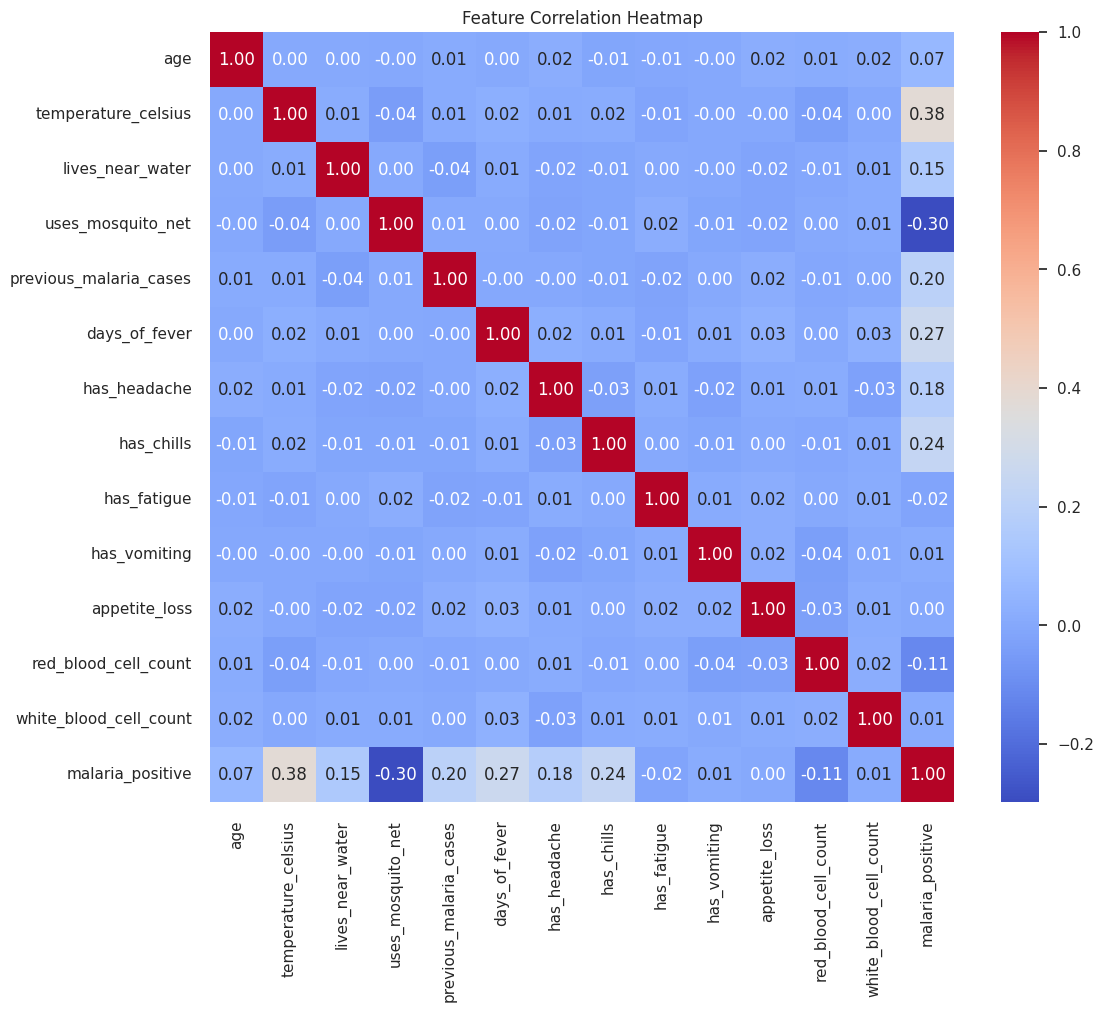

In [ ]:

# Correlation heatmap for numeric features
plt.figure(figsize=(12,10))
corr = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## 4️⃣b Bivariate Analysis

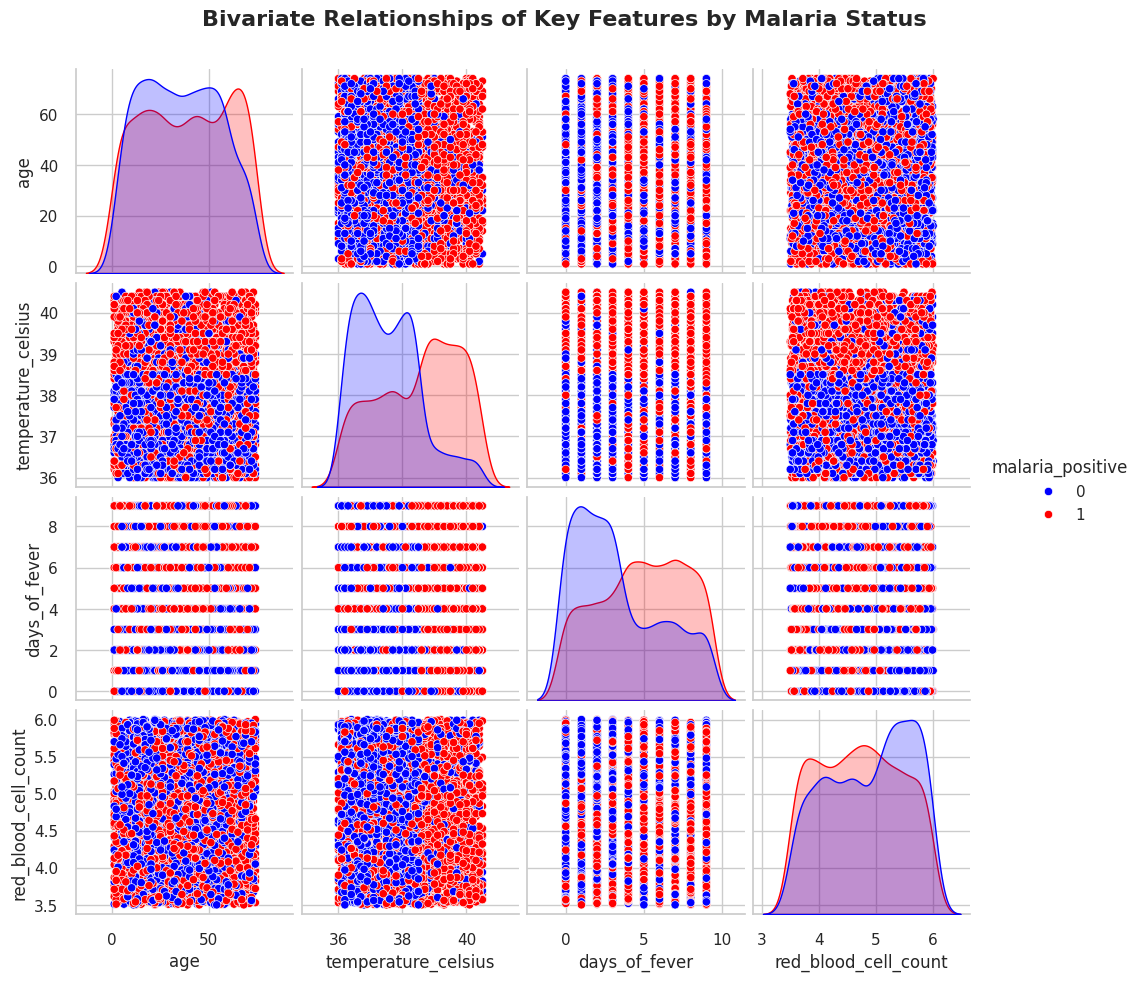

In [ ]:
# Bivariate Analysis
top_features = ['age', 'temperature_celsius', 'days_of_fever', 'red_blood_cell_count']

sns.pairplot(
    data[top_features + ['malaria_positive']],
    hue='malaria_positive',
    palette={0: 'blue', 1: 'red'},
    diag_kind='kde',
    height=2.5
)

# Adjust layout and title
plt.subplots_adjust(top=0.92)
plt.suptitle(
    "Bivariate Relationships of Key Features by Malaria Status",
    fontsize=16,
    fontweight='bold'
)
plt.show()

## 5️⃣ PyCaret Setup

In [ ]:

# PyCaret Setup
clf = setup(
    data=data,
    target='malaria_positive',
    session_id=42,
    normalize=True,
    remove_outliers=True,
    categorical_features=['region','season'],
    numeric_features=['age','temperature_celsius','lives_near_water',
                      'uses_mosquito_net','previous_malaria_cases','days_of_fever',
                      'has_headache','has_chills','has_fatigue','has_vomiting',
                      'appetite_loss','red_blood_cell_count','white_blood_cell_count'],
    remove_multicollinearity=True,
    fold=5,
    verbose=True
)

,Description,Value
0,Session id,42
1,Target,malaria_positive
2,Target type,Binary
3,Original data shape,"(4000, 16)"
4,Transformed data shape,"(3860, 21)"
5,Transformed train set shape,"(2660, 21)"
6,Transformed test set shape,"(1200, 21)"
7,Numeric features,13
8,Categorical features,2
9,Preprocess,True


## 6️⃣ Compare Models

**Reasoning:**  
- **Primary metric: F1 score** because malaria prediction requires balanced detection of positives and negatives, especially when some misclassifications are costly.  
- **Secondary metric: Accuracy** (Plan B) since our dataset is perfectly balanced (50% positive, 50% negative). This ensures we also test overall correct prediction rate.

We first select top models by F1, then check Accuracy as a backup plan.

In [ ]:

# Compare models by F1 (primary metric)
best_models_f1 = compare_models(n_select=5, sort='F1')
print("Top 5 models sorted by F1 score:")
print(best_models_f1)

# Check Accuracy too (balanced dataset, Plan B)
best_models_acc = compare_models(n_select=5, sort='Accuracy')
print("\nTop 5 models sorted by Accuracy (Plan B):")
print(best_models_acc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9179,0.9779,0.9057,0.9285,0.9168,0.8357,0.8362,0.4920
gbc,Gradient Boosting Classifier,0.8918,0.9652,0.8586,0.9197,0.8881,0.7836,0.7853,1.0060
lightgbm,Light Gradient Boosting Machine,0.8843,0.9581,0.8643,0.9005,0.8818,0.7686,0.7695,1.1260
xgboost,Extreme Gradient Boosting,0.8743,0.9537,0.8557,0.8892,0.8719,0.7486,0.7494,0.4480
rf,Random Forest Classifier,0.8700,0.9508,0.8329,0.8999,0.8649,0.7400,0.7423,0.7480
lr,Logistic Regression,0.8543,0.9331,0.8407,0.8643,0.8521,0.7086,0.7091,3.3960
ridge,Ridge Classifier,0.8493,0.9325,0.8100,0.8793,0.8430,0.6986,0.7011,0.5520
lda,Linear Discriminant Analysis,0.8493,0.9325,0.8100,0.8793,0.8430,0.6986,0.7011,0.3300
et,Extra Trees Classifier,0.8454,0.9259,0.8093,0.8728,0.8396,0.6907,0.6929,0.6540
svm,SVM - Linear Kernel,0.8325,0.9169,0.8229,0.8398,0.8307,0.6650,0.6660,0.3400


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Top 5 models sorted by F1 score:
[AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9179,0.9779,0.9057,0.9285,0.9168,0.8357,0.8362,0.4760
gbc,Gradient Boosting Classifier,0.8918,0.9652,0.8586,0.9197,0.8881,0.7836,0.7853,0.7660
lightgbm,Light Gradient Boosting Machine,0.8843,0.9581,0.8643,0.9005,0.8818,0.7686,0.7695,0.5240
xgboost,Extreme Gradient Boosting,0.8743,0.9537,0.8557,0.8892,0.8719,0.7486,0.7494,0.4180
rf,Random Forest Classifier,0.8700,0.9508,0.8329,0.8999,0.8649,0.7400,0.7423,0.8940
lr,Logistic Regression,0.8543,0.9331,0.8407,0.8643,0.8521,0.7086,0.7091,0.5360
ridge,Ridge Classifier,0.8493,0.9325,0.8100,0.8793,0.8430,0.6986,0.7011,0.3240
lda,Linear Discriminant Analysis,0.8493,0.9325,0.8100,0.8793,0.8430,0.6986,0.7011,0.4260
et,Extra Trees Classifier,0.8454,0.9259,0.8093,0.8728,0.8396,0.6907,0.6929,0.6300
svm,SVM - Linear Kernel,0.8325,0.9169,0.8229,0.8398,0.8307,0.6650,0.6660,0.3300


Processing:   0%|          | 0/69 [00:00<?, ?it/s]


Top 5 models sorted by Accuracy (Plan B):
[AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=

### Feature Importance Plot (Top Model)

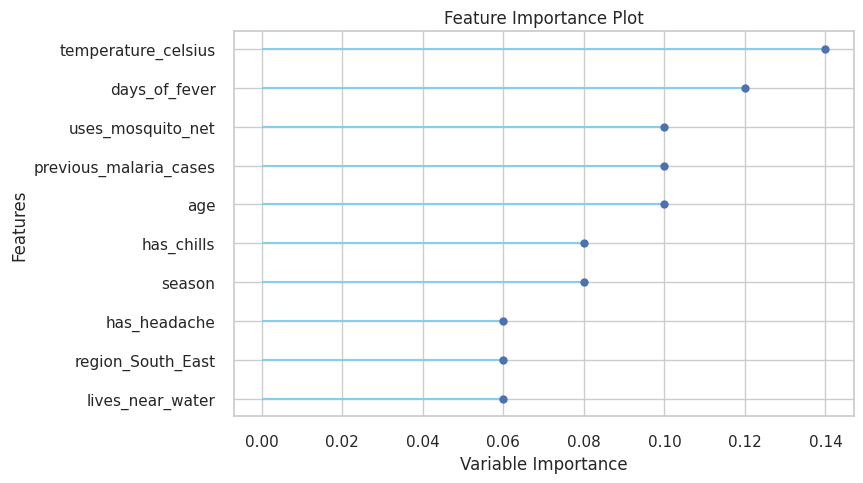

In [ ]:

# Plot feature importance for top model
plot_model(best_models_f1[0], plot='feature')

## 7️⃣ Finalize and Train Model

In [ ]:
# Select the top-performing model (F1)
final_model = best_models_f1[0]

# Train on full dataset
final_model = finalize_model(final_model)
print("Final model trained on full dataset.")

Final model trained on full dataset.


## 8️⃣ Save the Model

In [ ]:
# Save the final model
save_model(final_model, 'malaria_risk_model')
print("Model saved as malaria_risk_model.pkl")

Transformation Pipeline and Model Successfully Saved
Model saved as malaria_risk_model.pkl


## 9️⃣ Download Model (Colab)

In [ ]:

# Download model to local machine (Colab)
from google.colab import files
files.download("malaria_risk_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Summary & Insights

### Model Performance (Top Model)
**Best Model:** AdaBoost Classifier

- **F1 Score:** 0.9168 (primary metric)
- **Accuracy:** 91.79% (secondary, for balanced dataset)
- **AUC:** 0.9779
- **Recall:** 0.9057
- **Precision:** 0.9285

### Top Predictive Features
1. Temperature
2. Days of fever
3. Mosquito net usage
4. Previous malaria cases
5. Age
6. Chills
7. Season
8. Headache
9. Region
10. Living near water

### Key Insights
- Clinical symptoms are strongest predictors (temperature, fever, chills).  
- Preventive behavior (mosquito net usage) significantly affects risk.  
- Environmental factors (season, proximity to water) also influence likelihood.  
- High F1 and Accuracy indicate robust, balanced performance.

### Project Impact
- Supports early malaria risk screening  
- Assists healthcare workers in clinics  
- Reduces diagnostic delays  
- Improves patient triage